# Mushrooms!
#### "Leaves of three, let me be" helps you stay away from poison oak, but how do you avoid poison mushrooms?

In [1]:
# data analysis and wrangling
import csv
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt

%matplotlib inline

**Convert** .txt mushroom data to csv file

In [2]:
#
#with open('agaricus-lepiota.txt', 'r') as in_file:
#    stripped = (line.strip() for line in in_file)
#    lines = (line.split(",") for line in stripped if line)
#    with open('data.csv', 'w') as out_file:
#        writer = csv.writer(out_file)
#        writer.writerow(('classification', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
#                         'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
#                         'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
#                         'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
#                         'spore-print-color', 'population', 'habitat'))
#        writer.writerows(lines)

### Note from Erin

I added an index column after converting from .txt to .csv 

Use the .csv file from our project folder rather using the one created by the command above

### Bernoulli Naive Bayes Practice

In [3]:
#Not sure what this import is for exactly
import sklearn.datasets as ds

#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

In [4]:
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])

clf = BernoulliNB()
clf.fit(X, y)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print(clf.predict(X[2:3]))

[3]


### Exploratory Data Analysis

**Read shroom data file **

In [5]:
shroom = pd.read_csv("data.csv", index_col='index')

**Display** features (Column headers)

In [6]:
print(shroom.columns.values)

['classification' 'cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor'
 'gill-attachment' 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-root' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type' 'veil-color'
 'ring-number' 'ring-type' 'spore-print-color' 'population' 'habitat']


In [7]:
shroom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 1 to 8124
Data columns (total 23 columns):
classification              8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [8]:
len(shroom)

8124

In [9]:
shroom.head()

,classification,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
index,,,,,,,,,,,,,,,,,,,,,
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
5,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Note**
Attributes to remove (Columns) because stdev = ~0 (almost all mushrooms same)
* gill-attachment
* stalk-color-above-ring 
* stalk-color-below-ring
* veil-type (stdev = 0, ALL mushrooms type s)
* veil-color
* ring-number


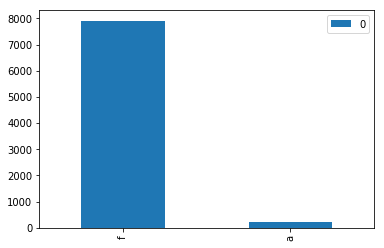

In [12]:
from collections import Counter

letter_counts = Counter(shroom["gill-attachment"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

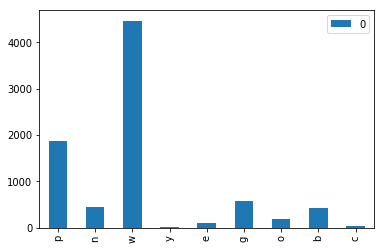

In [13]:
# Distribution for stalk-color-above-ring
letter_counts = Counter(shroom["stalk-color-above-ring"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

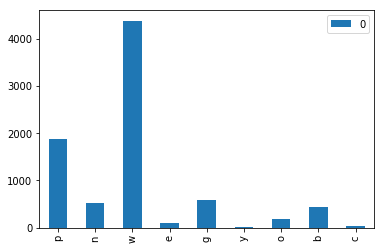

In [14]:
# Distribution for stalk-color-below-ring
stalk_color_below_ring_counts = Counter(shroom["stalk-color-below-ring"])
df = pd.DataFrame.from_dict(stalk_color_below_ring_counts, orient='index')
df.plot(kind="bar")

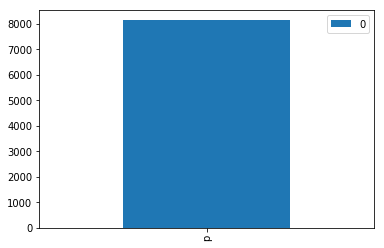

In [15]:
# Distribution for veil-type
letter_counts = Counter(shroom["veil-type"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

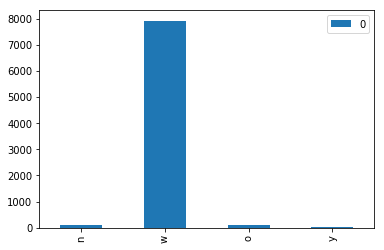

In [16]:
# Distribution for veil-color
letter_counts = Counter(shroom["veil-color"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

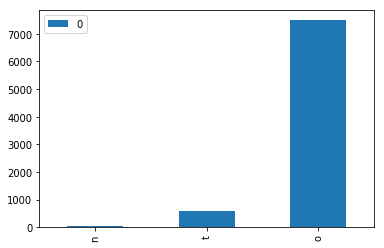

In [17]:
# Distribution for ring-number
letter_counts = Counter(shroom["ring-number"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

In [18]:
print(stalk_color_below_ring_counts)

Counter({'w': 4384, 'p': 1872, 'g': 576, 'n': 512, 'b': 432, 'o': 192, 'e': 96, 'c': 36, 'y': 24})


In [19]:
pd.get_dummies(shroom).corr()

,classification_e,classification_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
classification_e,1.000000,-1.000000,0.182567,-0.023007,-0.018526,-0.163565,0.060664,0.026886,0.195415,-0.023007,...,0.159572,-0.443722,0.107055,0.126123,0.165004,-0.155150,0.138627,-0.323346,-0.112078,0.150087
classification_p,-1.000000,1.000000,-0.182567,0.023007,0.018526,0.163565,-0.060664,-0.026886,-0.195415,0.023007,...,-0.159572,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
cap-shape_b,0.182567,-0.182567,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,...,0.158702,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764
cap-shape_c,-0.023007,0.023007,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,...,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,-0.018526,0.018526,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,...,-0.075804,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_k,-0.163565,0.163565,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,...,-0.089360,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003
cap-shape_s,0.060664,-0.060664,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,...,-0.026791,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784
cap-shape_x,0.026886,-0.026886,-0.219564,-0.020077,-0.720235,-0.304733,-0.056884,1.000000,0.063511,-0.020077,...,0.059264,-0.060421,0.044626,0.071773,0.023197,-0.096639,-0.004529,-0.029042,0.002845,-0.036493
cap-surface_f,0.195415,-0.195415,-0.091638,-0.014032,0.064801,-0.158942,0.099464,0.063511,1.000000,-0.014032,...,-0.033553,-0.116485,0.210552,0.190756,0.080694,-0.191987,-0.122077,-0.086727,-0.011913,-0.098365
cap-surface_g,-0.023007,0.023007,0.018820,0.249631,-0.006285,0.010863,-0.001396,-0.020077,-0.014032,1.000000,...,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453


In [28]:
def plot_corr(df,size=23):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = pd.get_dummies(df).corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

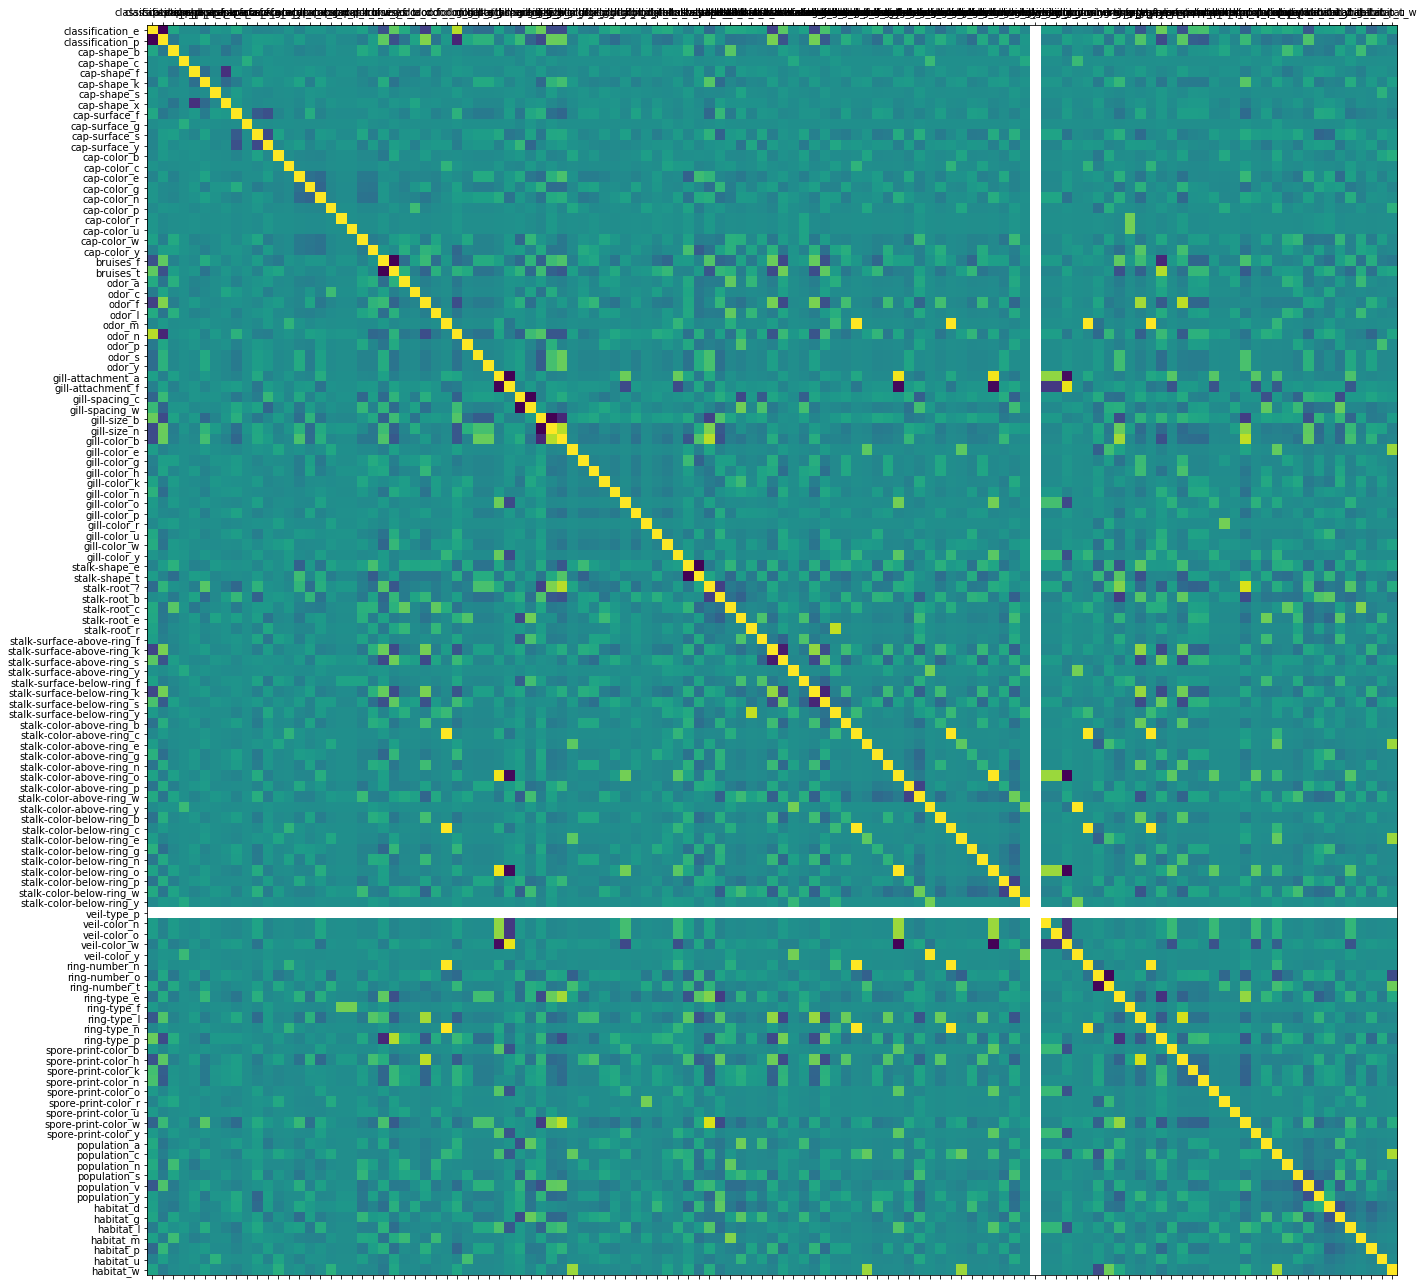

In [29]:
plot_corr(shroom)

In [30]:
# Read file into a Pandas dataframe
from pandas import DataFrame, read_csv
f = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
df = read_csv(f)
df=df[0:10]
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
5,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
6,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
7,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
8,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
9,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


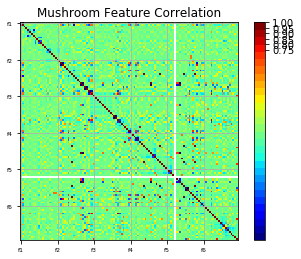

In [20]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Mushroom Feature Correlation')
    labels=['f0','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14',
           'f15','f16','f17','f18','f19','f20','f21', 'f22']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(pd.get_dummies(shroom))

In [21]:
df_class = shroom.loc[: , "classification"]

In [22]:
df_class.head()

index
1    p
2    e
3    e
4    p
5    e
Name: classification, dtype: object

In [23]:
shroom.head()

,classification,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
index,,,,,,,,,,,,,,,,,,,,,
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
5,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [24]:
dfa = pd.get_dummies(df_class)
dfb = pd.get_dummies(shroom)
df_corr = dfa.corrwith(dfb)
df_corr.head()

bruises_f     NaN
bruises_t     NaN
cap-color_b   NaN
cap-color_c   NaN
cap-color_e   NaN
dtype: float64

In [25]:
df_classification = shroom.iloc[:,0:1]
df_classification.head()

,classification
index,
1,p
2,e
3,e
4,p
5,e


In [37]:
df_features = shroom.iloc[:,1:24]
df_features.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
index,,,,,,,,,,,,,,,,,,,,,
1,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
2,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
3,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
4,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
5,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [26]:
def correlation_matrix(df,labels,matrixTitle):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 20)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(matrixTitle)
    
    ax1.set_xticks(np.arange(0, len(labels), 1))
    ax1.set_yticks(np.arange(0, len(labels), 1))
    
    ax1.set_xticklabels(labels,fontsize=12, rotation=90)
    ax1.set_yticklabels(labels,fontsize=12)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)
    plt.show()


In [27]:
pd.get_dummies(shroom[["classification","cap-shape"]]).head()

,classification_e,classification_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
index,,,,,,,,
1,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1


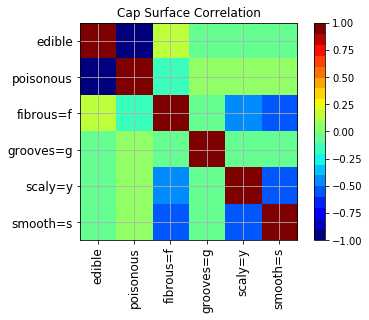

In [28]:
labels = ["edible", "poisonous", "fibrous=f","grooves=g","scaly=y","smooth=s"]
correlation_matrix(pd.get_dummies(shroom[["classification","cap-surface"]]), labels, 'Cap Surface Correlation')

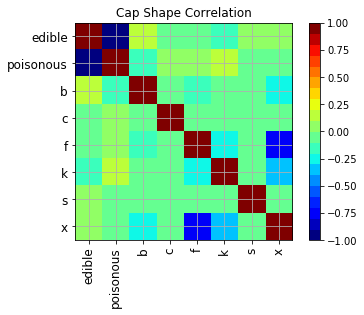

In [41]:
labels=['edible','poisonous','b','c','f','k','s','x']
correlation_matrix(pd.get_dummies(shroom[["classification","cap-shape"]]), labels, 'Cap Shape Correlation')

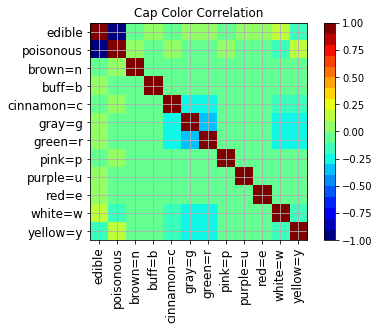

In [42]:
label = ["edible","poisonous","brown=n","buff=b","cinnamon=c",
         "gray=g","green=r","pink=p","purple=u","red=e","white=w","yellow=y"]
correlation_matrix(pd.get_dummies(shroom[["classification","cap-color"]]), label, 'Cap Color Correlation')


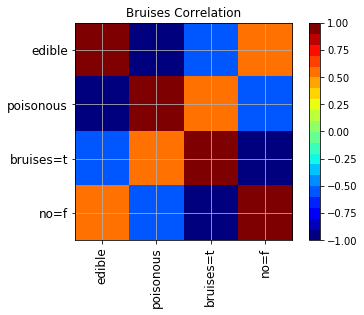

In [43]:
label = ["edible","poisonous","bruises=t","no=f"]
correlation_matrix(pd.get_dummies(shroom[["classification","bruises"]]), label, 'Bruises Correlation')

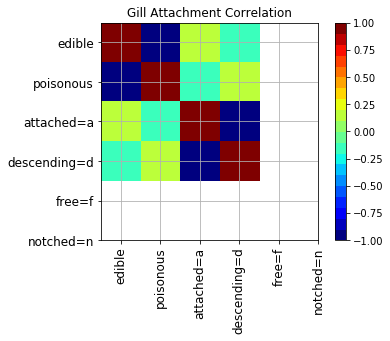

In [44]:
label = ["edible","poisonous","attached=a","descending=d", "free=f", "notched=n"]
correlation_matrix(pd.get_dummies(shroom[["classification","gill-attachment"]]), label, 'Gill Attachment Correlation')

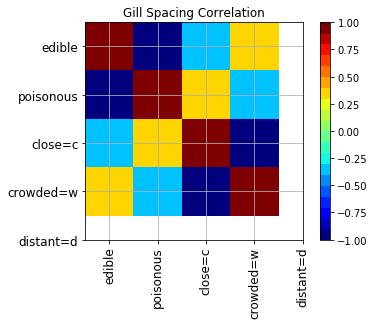

In [45]:
label = ["edible","poisonous","close=c","crowded=w", "distant=d"]
correlation_matrix(pd.get_dummies(shroom[["classification","gill-spacing"]]), label, 'Gill Spacing Correlation')

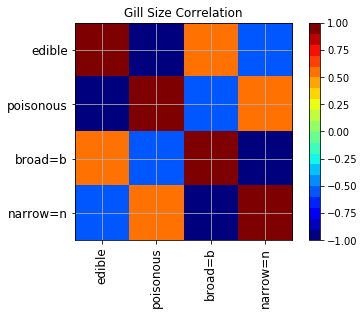

In [46]:
label = ["edible","poisonous","broad=b","narrow=n"]
correlation_matrix(pd.get_dummies(shroom[["classification","gill-size"]]), label, 'Gill Size Correlation')

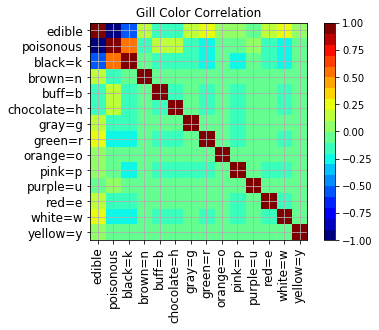

In [47]:
label = ["edible","poisonous","black=k","brown=n","buff=b","chocolate=h",
         "gray=g","green=r","orange=o","pink=p","purple=u","red=e","white=w","yellow=y"]
correlation_matrix(pd.get_dummies(shroom[["classification","gill-color"]]), label, 'Gill Color Correlation')

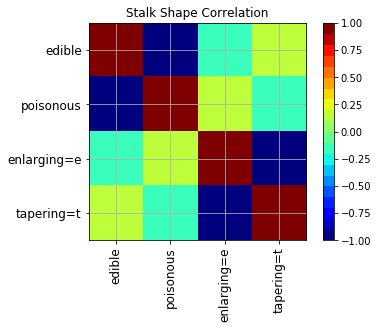

In [49]:
label = ["edible","poisonous","enlarging=e","tapering=t"]
correlation_matrix(pd.get_dummies(shroom[["classification","stalk-shape"]]), label, 'Stalk Shape Correlation')

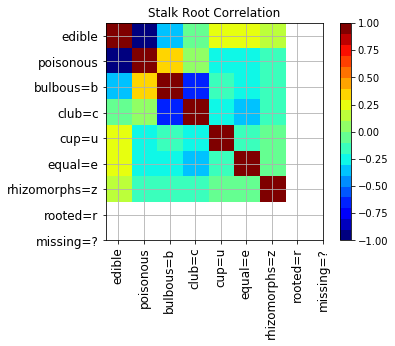

In [50]:
label = ["edible","poisonous", "bulbous=b","club=c","cup=u","equal=e", "rhizomorphs=z","rooted=r","missing=?"]
correlation_matrix(pd.get_dummies(shroom[["classification","stalk-root"]]), label, 'Stalk Root Correlation')

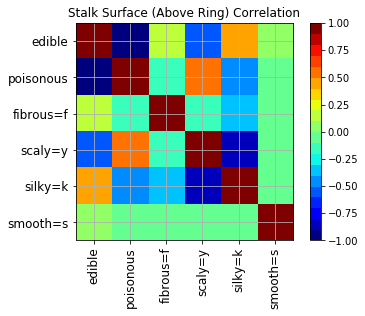

In [51]:
label = ["edible","poisonous","fibrous=f","scaly=y","silky=k","smooth=s"]
correlation_matrix(pd.get_dummies(shroom[["classification","stalk-surface-above-ring"]]), label, 'Stalk Surface (Above Ring) Correlation')

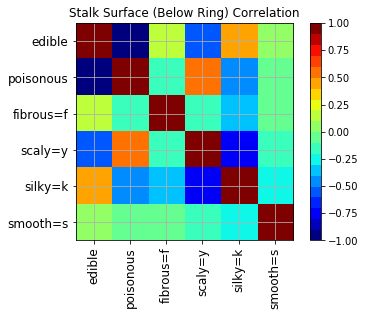

In [52]:
label = ["edible","poisonous","fibrous=f","scaly=y","silky=k","smooth=s"]
correlation_matrix(pd.get_dummies(shroom[["classification","stalk-surface-below-ring"]]), label, 'Stalk Surface (Below Ring) Correlation')

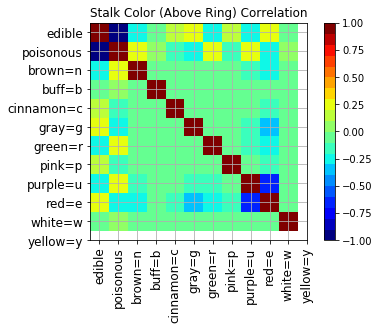

In [53]:
label = ["edible","poisonous","brown=n","buff=b","cinnamon=c",
         "gray=g","green=r","pink=p","purple=u","red=e","white=w","yellow=y"]
correlation_matrix(pd.get_dummies(shroom[["classification","stalk-color-above-ring"]]), label, 'Stalk Color (Above Ring) Correlation')


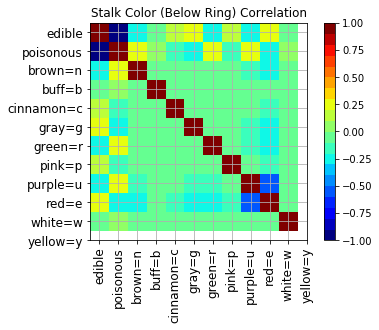

In [54]:
label = ["edible","poisonous","brown=n","buff=b","cinnamon=c",
         "gray=g","green=r","pink=p","purple=u","red=e","white=w","yellow=y"]
correlation_matrix(pd.get_dummies(shroom[["classification","stalk-color-below-ring"]]), label, 'Stalk Color (Below Ring) Correlation')


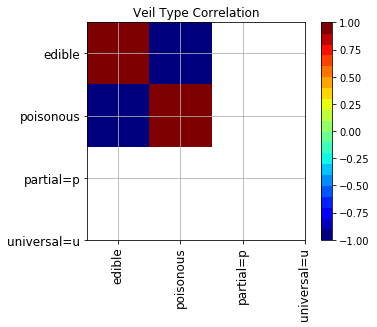

In [55]:
label = ["edible","poisonous","partial=p","universal=u"]
correlation_matrix(pd.get_dummies(shroom[["classification","veil-type"]]), label, 'Veil Type Correlation')

**Note on Veil Type **

All veils are of type "partial" <--- just from a cursory look, have to actually check that one...

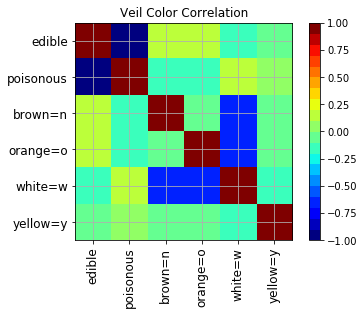

In [56]:
label = ["edible","poisonous","brown=n","orange=o","white=w","yellow=y"]
correlation_matrix(pd.get_dummies(shroom[["classification","veil-color"]]), label, 'Veil Color Correlation')

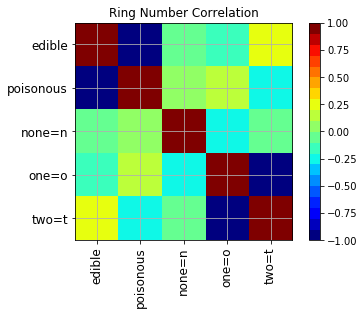

In [29]:
label = ["edible","poisonous","none=n","one=o","two=t" ]
correlation_matrix(pd.get_dummies(shroom[["classification","ring-number"]]), label, 'Ring Number Correlation')

In [3]:
label = ["edible","poisonous","cobwebby=c","evanescent=e","flaring=f","large=l", "none=n","pendant=p",
         "sheathing=s","zone=z"]
correlation_matrix(pd.get_dummies(shroom[["classification","ring-type"]]), label, 'Ring Type Correlation')

NameError: name 'correlation_matrix' is not defined

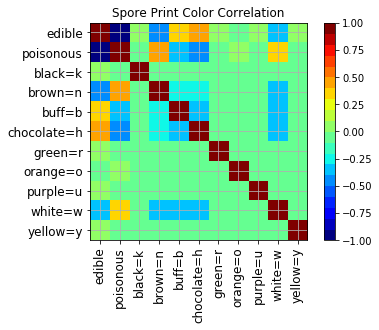

In [31]:
label = ["edible","poisonous","black=k","brown=n","buff=b","chocolate=h","green=r","orange=o","purple=u","white=w",
         "yellow=y"]
correlation_matrix(pd.get_dummies(shroom[["classification","spore-print-color"]]), label, 'Spore Print Color Correlation')

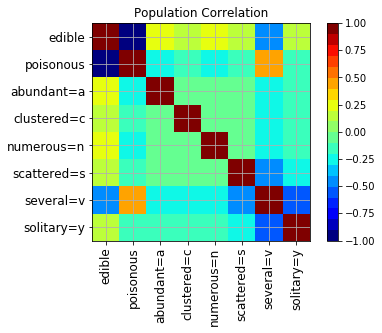

In [32]:
label = ["edible","poisonous","abundant=a","clustered=c","numerous=n", "scattered=s","several=v","solitary=y" ]
correlation_matrix(pd.get_dummies(shroom[["classification","population"]]), label, 'Population Correlation')

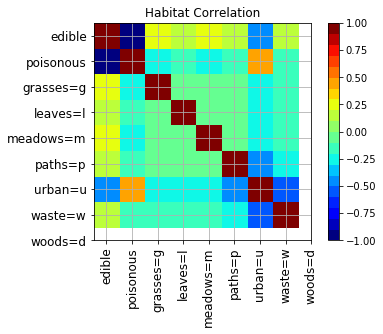

In [33]:
label = ["edible","poisonous","grasses=g","leaves=l","meadows=m","paths=p", "urban=u","waste=w","woods=d" ]
correlation_matrix(pd.get_dummies(shroom[["classification","population"]]), label, 'Habitat Correlation')

SyntaxError: invalid syntax (<ipython-input-2-60813adc7573>, line 40)